In [182]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sdv import multi_table
from sdv.multi_table.hma import HMASynthesizer

In [183]:
data = pd.read_csv('dataset.csv')

In [184]:
def summarize_dataset(data, num_head=5, num_tail=5, drop_columns=None, drop_duplicates=False):
    """
    Summarizes a DataFrame.

    Parameters:
    data (DataFrame): The DataFrame to summarize.
    num_head (int): Specifies how many rows to display from the beginning.
    num_tail (int): Specifies how many rows to display from the end.
    drop_columns (list): List of columns to drop.
    drop_duplicates (bool): Used to remove duplicates from the DataFrame.

    Returns:
    DataFrame: The processed DataFrame.
    """
    print(f"First {num_head} rows:")
    print(data.head(num_head))
    print("\n")
    
    print(f"Last {num_tail} rows:")
    print(data.tail(num_tail))
    print("\n")
    
    print("Columns:")
    print(data.columns)
    print("\n")

    print("Data Information:")
    data.info()
    print("\n")
    
    missing_values = data.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    print(f"Missing Values:\n{missing_columns}")
    print("\n")
    
    print("Statistical Summary:")
    print(data.describe())
    print("\n")
    
    print("Data Shape:")
    print(data.shape)
    print("\n")
    
    num_duplicates = data.duplicated().sum()
    print(f"Number of duplicated rows: {num_duplicates}")
    print("\n")

    if drop_duplicates:
        initial_rows = data.shape[0]  
        if drop_columns:
            data.drop_duplicates(subset=drop_columns, inplace=True)
        else:
            data.drop_duplicates(inplace=True)
        dropped_rows = initial_rows - data.shape[0]  
        print(f"Number of dropped rows: {dropped_rows}")
    return data

In [185]:
summarize_dataset(data, drop_duplicates=False)

First 5 rows:
      sr      rr       t      lm      bo    rem   sr.1     hr  sl
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20   3
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76   3
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84   3
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0


Last 5 rows:
         sr      rr       t      lm      bo     rem   sr.1     hr  sl
625  69.600  20.960  92.960  10.960  90.960   89.80  3.440  62.40   2
626  48.440  17.376  98.064   6.752  96.376   73.76  8.376  53.44   0
627  97.504  27.504  86.880  17.752  84.256  101.88  0.000  78.76   4
628  58.640  19.728  95.728   9.728  94.592   84.32  6.728  59.32   1
629  73.920  21.392  93.392  11.392  91.392   91.96  4.088  63.48   2


Columns:
Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeI

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


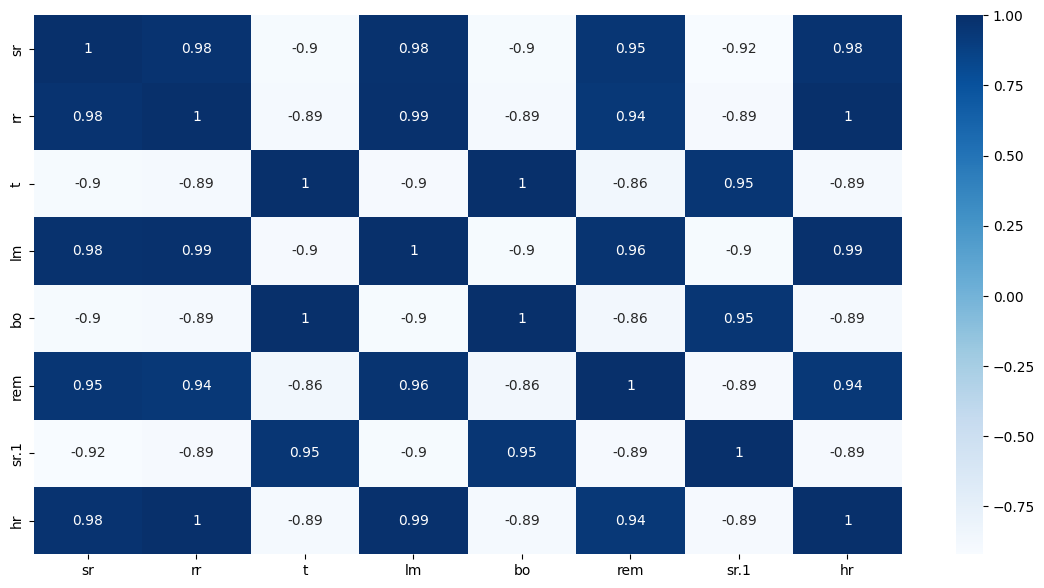

In [186]:
matrix =data.iloc[:,:-1].corr()
plt.figure(figsize = (14,7))
lit = sns.heatmap(matrix, annot=True, cmap="Blues")

In [187]:
data2 = pd.read_csv("dataset2.csv")

In [188]:
summarize_dataset(data2, drop_duplicates=False)

First 5 rows:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80    

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [189]:
df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data2)

df1.rename(columns={'sl': 'Stress Level'}, inplace=True)


In [190]:
df2[['Systolic', 'Diastolic']] = df2['Blood Pressure'].str.split('/', expand=True).apply(pd.to_numeric)
df2 = df2.drop('Blood Pressure', axis=1)


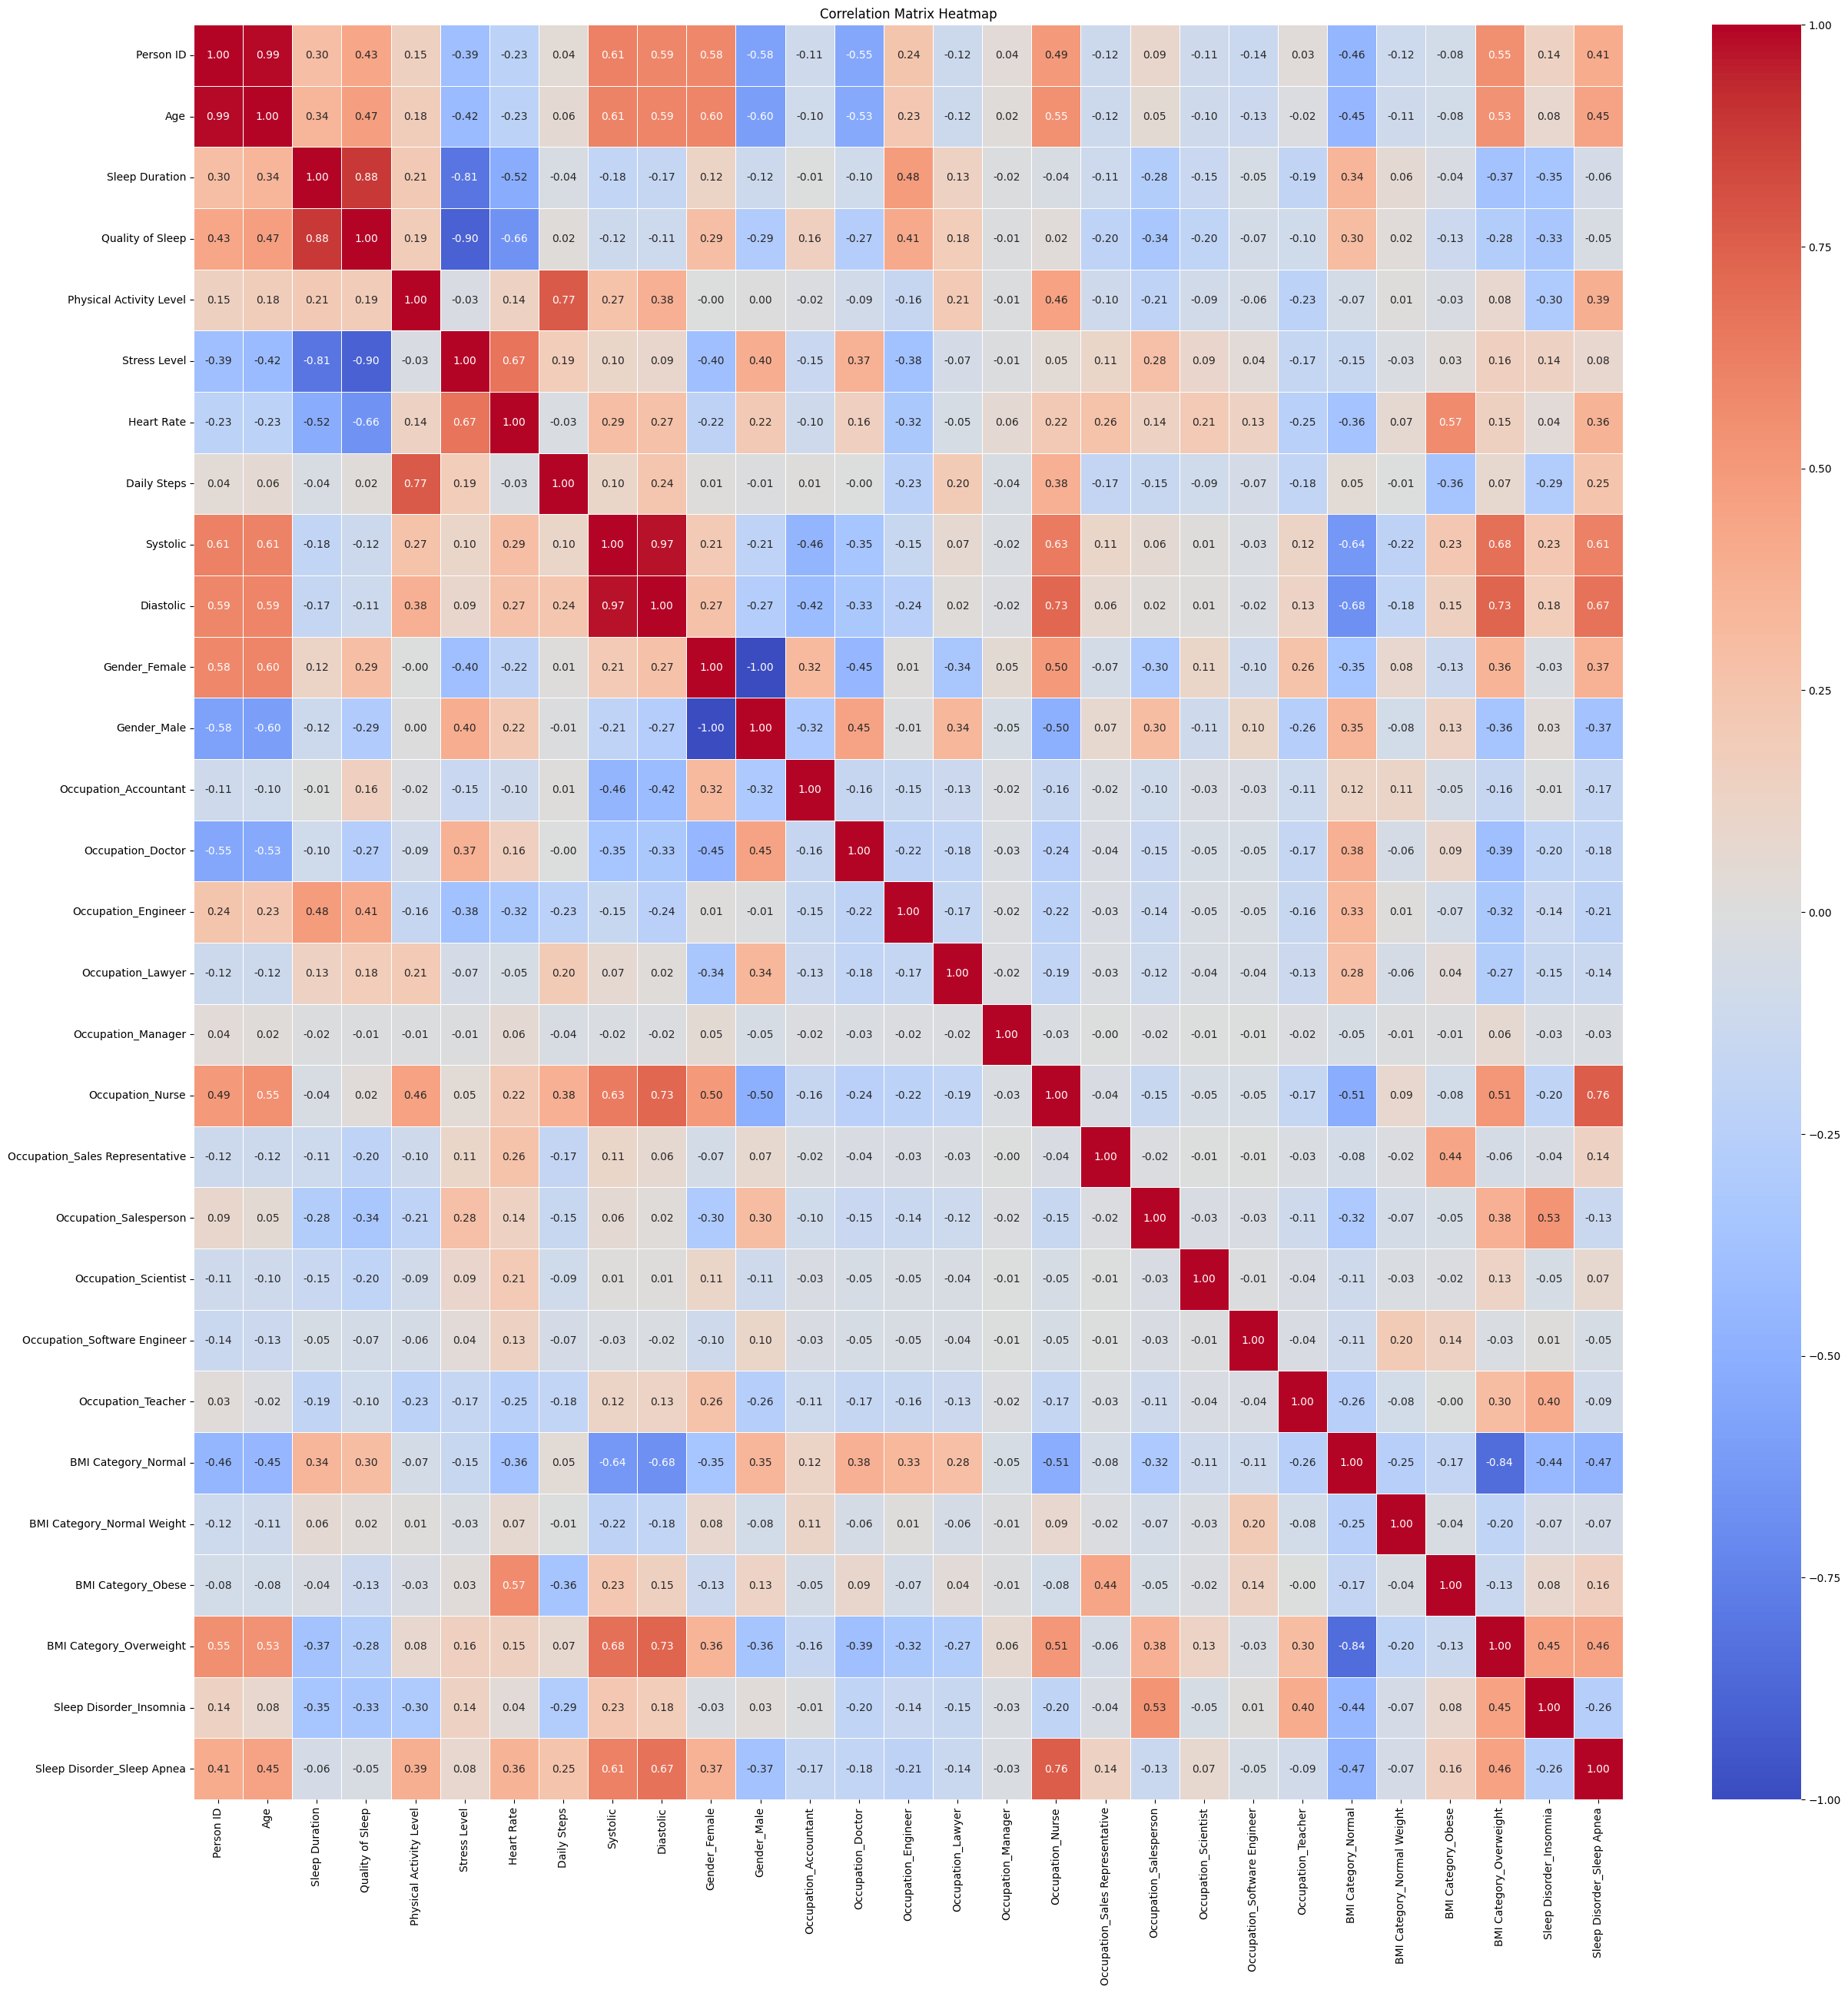

In [191]:
    # One-hot encode categorical variables 
df_encoded = pd.get_dummies(df2, columns=['Gender', 'Occupation', 'BMI Category',"Sleep Disorder"])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [192]:
correlations_with_target = correlation_matrix['Stress Level'].sort_values(ascending=False)

print(correlations_with_target)



Stress Level                       1.000000
Heart Rate                         0.670026
Gender_Male                        0.396018
Occupation_Doctor                  0.368038
Occupation_Salesperson             0.278757
Daily Steps                        0.186829
BMI Category_Overweight            0.157406
Sleep Disorder_Insomnia            0.139380
Occupation_Sales Representative    0.108196
Systolic                           0.102818
Occupation_Scientist               0.094753
Diastolic                          0.091811
Sleep Disorder_Sleep Apnea         0.081582
Occupation_Nurse                   0.045274
Occupation_Software Engineer       0.036081
BMI Category_Obese                 0.029459
Occupation_Manager                -0.011250
BMI Category_Normal Weight        -0.026776
Physical Activity Level           -0.034134
Occupation_Lawyer                 -0.068714
Occupation_Accountant             -0.147791
BMI Category_Normal               -0.151259
Occupation_Teacher              

In [193]:
occupation_columns = [col for col in correlation_matrix.columns if 'Occupation' in col]
gender_columns = [col for col in correlation_matrix.columns if 'Gender' in col]
bmi_columns = [col for col in correlation_matrix.columns if 'BMI Category' in col]
sleep_columns = [col for col in correlation_matrix.columns if 'Sleep' in col]

# Her bir kategorik değişken grubu için korelasyon toplamını hesaplayın
sum_occupation = correlation_matrix.loc[occupation_columns, occupation_columns].sum().sum()
sum_gender = correlation_matrix.loc[gender_columns, gender_columns].sum().sum()
sum_bmi = correlation_matrix.loc[bmi_columns, bmi_columns].sum().sum()
sum_sleep = correlation_matrix.loc[sleep_columns, sleep_columns].sum().sum()


In [194]:
sum_occupation,sum_gender,sum_bmi,sum_sleep

(2.428507144167685,
 2.220446049250313e-16,
 0.7117241100990478,
 3.6618629378795973)

In [195]:
# bmi nın correlasyonu cok az droplayabılırız

In [196]:
df2 = df2.drop(['BMI Category'], axis=1)

In [197]:
df2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,140,95


In [198]:
df2["Stress Level"].value_counts()

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

In [199]:
df1["Stress Level"].value_counts()

Stress Level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

In [200]:

from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df1)

In [201]:
from sdv.single_table import TVAESynthesizer

synthesizer = TVAESynthesizer(metadata)
synthesizer.fit(df1)

synthetic_data = synthesizer.sample(num_rows=10)

In [202]:
synthetic_data

,sr,rr,t,lm,bo,rem,sr.1,hr,Stress Level
0,76.528,21.855,92.189,13.304,90.056,93.95,3.451,68.93,3
1,55.766,19.980,94.827,8.156,94.521,82.28,8.148,60.37,1
2,73.214,21.417,94.672,11.763,91.472,88.06,3.217,61.56,2
3,98.455,27.523,87.451,17.110,87.825,102.88,0.000,81.14,4
4,81.581,22.514,88.223,9.420,90.546,98.43,3.961,66.64,3
5,80.196,21.416,96.338,11.673,90.232,92.58,6.013,59.83,2
6,51.503,17.742,97.643,10.883,96.131,84.56,8.026,52.77,1
7,73.198,21.364,91.779,9.520,89.747,83.96,2.322,63.01,2
8,52.843,17.677,92.916,5.927,91.415,85.04,6.551,59.17,1
9,96.093,25.703,90.120,16.295,85.128,103.81,0.322,78.64,3


In [203]:
metadata2 = SingleTableMetadata()
metadata2.detect_from_dataframe(df2)
synthesizer2 = TVAESynthesizer(metadata2)
synthesizer2.fit(df2)

synthetic_data2 = synthesizer2.sample(num_rows=10)

In [204]:
synthetic_data2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,0,Female,52,Nurse,7.2,9,60,3,72,5054,Sleep Apnea,139,81
1,1,Male,34,Engineer,8.4,7,74,6,70,7858,NaN,119,81
2,2,Female,43,Engineer,6.3,7,47,4,65,5997,NaN,136,90
3,3,Male,34,Salesperson,6.2,6,45,7,72,6191,NaN,130,85
4,4,Female,34,Accountant,6.5,6,58,7,72,6045,Sleep Apnea,131,85
5,5,Female,54,Nurse,6.3,6,89,8,76,9913,Sleep Apnea,140,95
6,6,Female,51,Nurse,5.9,6,90,8,75,9745,Sleep Apnea,140,95
7,7,Female,53,Nurse,6.2,6,88,8,75,5046,Sleep Apnea,139,95
8,8,Female,38,Accountant,7.3,8,60,4,68,7080,NaN,117,76
9,9,Female,37,Accountant,7.2,8,59,4,68,6972,NaN,119,75


In [205]:

merged_synthetic_data = pd.merge(synthetic_data, synthetic_data2, on='Stress Level', how='left')
merged_synthetic_data

,sr,rr,t,lm,bo,rem,sr.1,hr,Stress Level,Person ID,...,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,76.528,21.855,92.189,13.304,90.056,93.95,3.451,68.93,3,0.0,...,52.0,Nurse,7.2,9.0,60.0,72.0,5054.0,Sleep Apnea,139.0,81.0
1,55.766,19.980,94.827,8.156,94.521,82.28,8.148,60.37,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73.214,21.417,94.672,11.763,91.472,88.06,3.217,61.56,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98.455,27.523,87.451,17.110,87.825,102.88,0.000,81.14,4,2.0,...,43.0,Engineer,6.3,7.0,47.0,65.0,5997.0,NaN,136.0,90.0
4,98.455,27.523,87.451,17.110,87.825,102.88,0.000,81.14,4,8.0,...,38.0,Accountant,7.3,8.0,60.0,68.0,7080.0,NaN,117.0,76.0
5,98.455,27.523,87.451,17.110,87.825,102.88,0.000,81.14,4,9.0,...,37.0,Accountant,7.2,8.0,59.0,68.0,6972.0,NaN,119.0,75.0
6,81.581,22.514,88.223,9.420,90.546,98.43,3.961,66.64,3,0.0,...,52.0,Nurse,7.2,9.0,60.0,72.0,5054.0,Sleep Apnea,139.0,81.0
7,80.196,21.416,96.338,11.673,90.232,92.58,6.013,59.83,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,51.503,17.742,97.643,10.883,96.131,84.56,8.026,52.77,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,73.198,21.364,91.779,9.520,89.747,83.96,2.322,63.01,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
